In [6]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 575 kB 25.2 MB/s 


In [2]:
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
import json
import shap
import tensorflow as tf


Load pre-trained model and choose 2 images to explain. 

In [3]:
model = ResNet50(weights='imagenet')

In [9]:
def f(X): 
  tmp = X.copy()
  preprocess_input(tmp)
  return model(tmp)

In [4]:
X, y = shap.datasets.imagenet50()

Load ImageNet class names as a vectorised mapping function from ids to names.

In [10]:
url = "https://s3.amazonaws.com/deep-learning-models/image-models/imagenet_class_index.json"
with open(shap.datasets.cache(url)) as file: 
  class_names = [v[1] for v in json.load(file).values()]

Define a masker that is used to mask out partitions of input image, this one uses a blurred background.

In [11]:
masker = shap.maskers.Image("inpaint_telea", X[0].shape)

By default the Partition Explainer is used for all partition explainer.

In [12]:
explainer = shap.Explainer(f, masker, output_names = class_names)

Here we use 500 evaluations of the underlying model to estimate SHAP values for 2 images. We use the top 4 predicted classes. 

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  50%|█████     | 1/2 [00:00<?, ?it/s]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer: 3it [03:08, 94.22s/it]


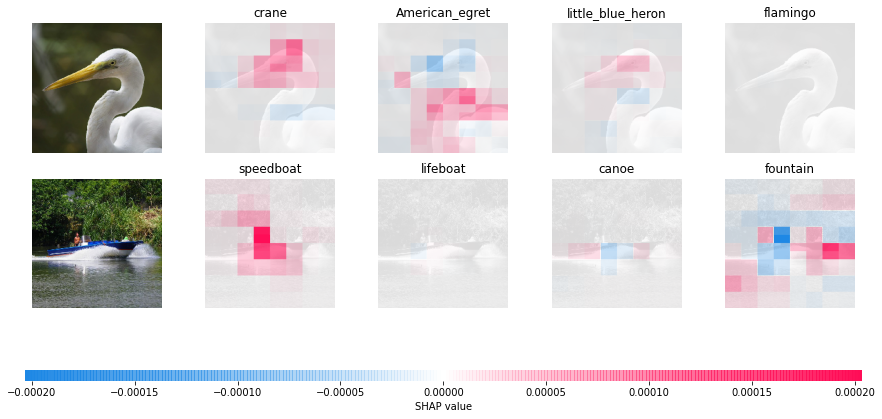

In [14]:
shap_values = explainer(X[1:3].astype('uint8'), max_evals=500, batch_size=50, outputs = shap.Explanation.argsort.flip[:4])
shap.image_plot(shap_values)

In [17]:
print(f"Shape of SHAP values array: {shap_values.values.shape}")

Shape of SHAP values array: (2, 224, 224, 3, 4)


Image dimension: (224, 224, 3)
We are evaluating 2 images, so (2, 224, 224, 3)
For each image, for each pixel, we have an associated SHAP value, and we are getting SHAP values for top 4 classes. So (2, 224, 224, 3, 4)

## References
1. SHAP image example: https://github.com/slundberg/shap/blob/master/notebooks/image_examples/image_classification/Multi-class%20ResNet50%20on%20ImageNet%20(TensorFlow).ipynb